# Partial Dependency Plots

Example to run univariate partial dependency plot (PDP) of a model depending on multiple features or predictors. The method is based on the technique of marginalization and assumes that all predictors are independent. In summary, in order to highlight the dependence of the model on a given feature we integrate over the remaining ones. 

In [1]:
from methods.partial_dependency import PDP
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Create some random data X and a target y variable that is a combination of some predictors in X plus Gaussian noise: 

In [2]:
np.random.seed(10) 

N = 100
X = np.random.rand(N,5)
y = 3*X[:,3] + 6*X[:,1] + np.random.normal(0,0.5,N) + 5
features = ["f"+str(i) for i in range(X.shape[1])]

We fit a linear regression model to our data: 

In [3]:
model = LinearRegression().fit(X, y)

Let us fit the PDP method for plotting the univariate relation between the model and one of the predictors we specify (e.g. f0):

In [4]:
config = {
    "model": model,
    "X": X, 
    "features": features,
    "predictor":"f0",
}

In [5]:
pdep = PDP(config)
ypartial = pdep.fit()

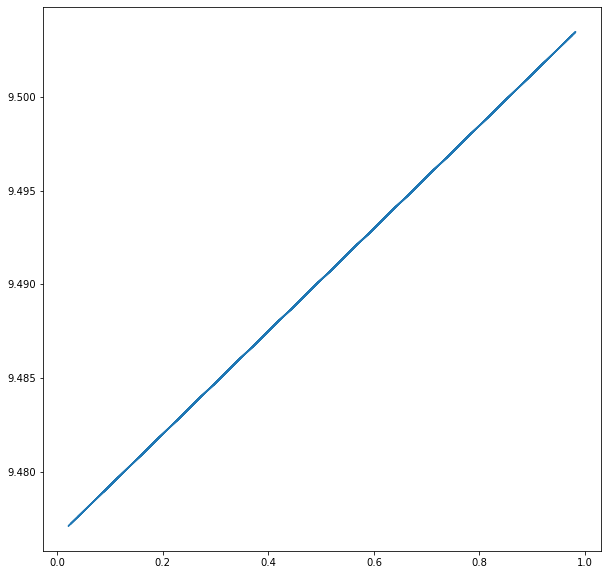

In [7]:
pdep.plot(ypartial)

We can also call the run_all() method if we want to fit the PDP algorithm and plot the results at the same time:

Feature  f0  importance:  0.003373764403213289


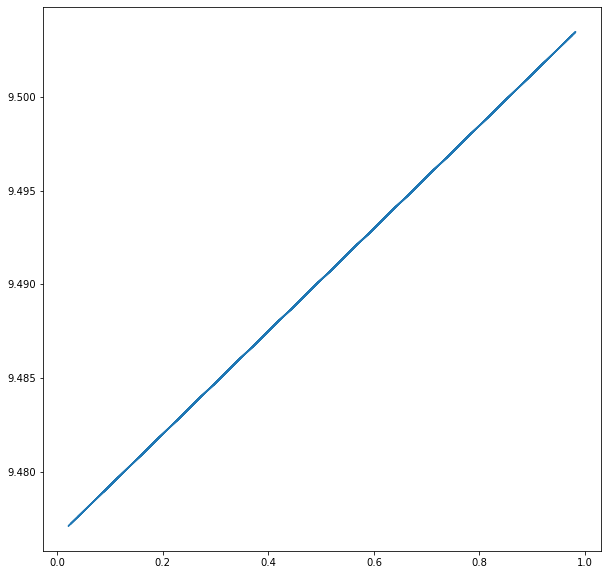

In [8]:
pdep.run_all()

Method performance: 

In [10]:
%timeit pdep.fit()

657 ms ± 45.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
